# Reverse-engineering of the surron ultrabee can bus

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import json
from importlib import reload
import genericFuntions

reload(genericFuntions)

<module 'genericFuntions' from 'C:\\Users\\FabianKlaffenboeck\\DataspellProjects\\SurronReverseEngineering\\genericFuntions.py'>

---
## Reading data from Files

In [2]:
dataCombinedDictAsc = genericFuntions.read_asc_files(["2024-05-05_10-48-53_004.asc","2024-05-05_10-50-13_005.asc"])

df = pd.DataFrame(dataCombinedDictAsc)
df

,lineId,Id,dlc,msg,time
0,0,ock Son Ma,1,9 2024\n,Begin Trigge
1,1,102,8,04 03 1C 00 00 00 00 23,0.005026
2,2,103,8,FF FF 2C 04 6E 00 00 9C,0.005264
3,3,104,8,D2 19 00 00 00 00 00 EB,0.005508
4,4,105,8,10 27 00 00 00 00 00 37,0.005756
...,...,...,...,...,...
13906,13906,103,8,FF FF 2C 04 6E 00 00 9C,19.567531
13907,13907,104,8,D2 19 00 00 00 00 00 EB,19.567775
13908,13908,105,8,10 27 00 00 00 00 00 37,19.568023
13909,13909,18E00000x,8,00 03 E7 03 2A 00 22 0F,19.568311


---
## Extracting all Ids 

In [4]:
messengeIds = list(map(lambda row: (row["Id"]), dataCombinedDictAsc))
uniqueIds = set(messengeIds)

df = pd.DataFrame(uniqueIds)
df

,0
0,202
1,311
2,112
3,316
4,304
5,204
6,105
7,113
8,201
9,315


---
## Massage CNT per Id

In [6]:
messagesPerId = []
for uniqueId in uniqueIds:
    var = list(map(lambda row: (row["msg"]), filter(lambda line: line["Id"] == uniqueId, dataCombinedDictAsc)))
    messagesPerId.append({
        "Id": uniqueId,
        "cnt": len(var),
        "msg": var
    })

df = pd.DataFrame(messagesPerId)
df

,Id,cnt,msg
0,202,172,"[09 01 00 00 00 00 00 0A , 09 01 00 00 00 00 0..."
1,311,342,"[02 00 00 00 4D 00 CB 02 , 02 00 00 00 4D 00 C..."
2,112,342,"[00 00 3A 34 00 00 00 00 , 00 00 3A 34 00 00 0..."
3,316,79,"[02 03 01 01 00 00 00 00 , 02 03 01 01 00 00 0..."
4,304,172,"[04 30 34 33 00 00 00 00 , 05 00 00 00 00 00 0..."
5,204,173,"[22 FF FF FF FF FF FF FF , E0 35 35 35 35 FF F..."
6,105,1720,"[10 27 00 00 00 00 00 37 , 10 27 00 00 00 00 0..."
7,113,342,"[01 01 00 00 00 00 00 00 , 01 01 00 00 00 00 0..."
8,201,172,"[00 00 C8 00 00 00 07 CF , 00 00 C8 00 00 00 0..."
9,315,171,"[05 05 03 03 02 00 03 03 , 05 05 03 03 02 00 0..."


---
## Condense to unique messages

In [ ]:
uniqueMessagesPerId = []

for message in messagesPerId:
    condensed = []

    for e in message["msg"]:
        if e not in condensed:
            condensed.append(e)

    uniqueMessagesPerId.append({
        "Id": message["Id"],
        "allCnt": message["cnt"],
        "uniqueCnt": len(condensed),
        "condensedMsg": condensed
    })

df = pd.DataFrame(uniqueMessagesPerId)
df

---
# Findings

---
## Speed information

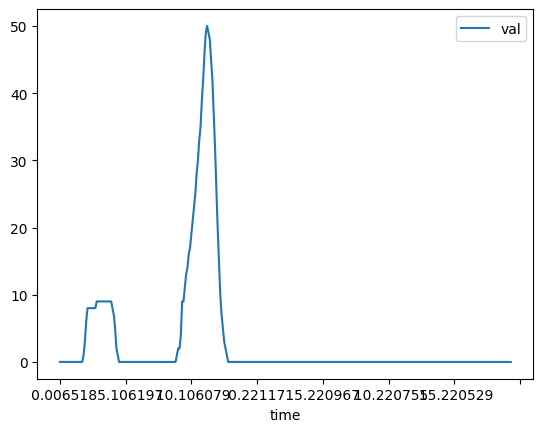

In [7]:
searchedId = "221"
dataByte = 0

plotData = map(lambda row: ({"time": row["time"], "val": int(row["msg"].split()[dataByte], 16)}),list(filter(lambda item: item['Id'] == searchedId,dataCombinedDictAsc)))
df = pd.DataFrame(plotData).plot("time", "val")